# Mohammad Mahdi Razmjoo - 400101272
---

# Data Visualization & Feature Engineering on the Online Retail Dataset

This notebook explores various techniques for visualizing data and engineering features, using the Online Retail dataset from the UCI Machine Learning Repository as a case study. It demonstrates how to examine data distributions and trends, as well as how to create new features such as ratio-based calculations, binning, functional transformations, column combinations, and time-related attributes. Additionally, it covers methods for counting and aggregating data, selecting features based on Mutual Information, and applying dimensionality reduction through PCA. The discussion also extends to scenarios where feature engineering is an optional enhancement versus a fundamental requirement. With transactional data including fields like InvoiceNo, InvoiceDate, Quantity, UnitPrice, and Country, this dataset serves as an excellent foundation for the analysis and objectives of this project.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set(style="whitegrid", context="talk")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

print("Dataset shape:", df.shape)
print(df.head())
df.info()
#We import the required libraries, load the dataset directly from the UCI Machine Learning Repository using its URL, and inspect its shape and contents.

Dataset shape: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
--

Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


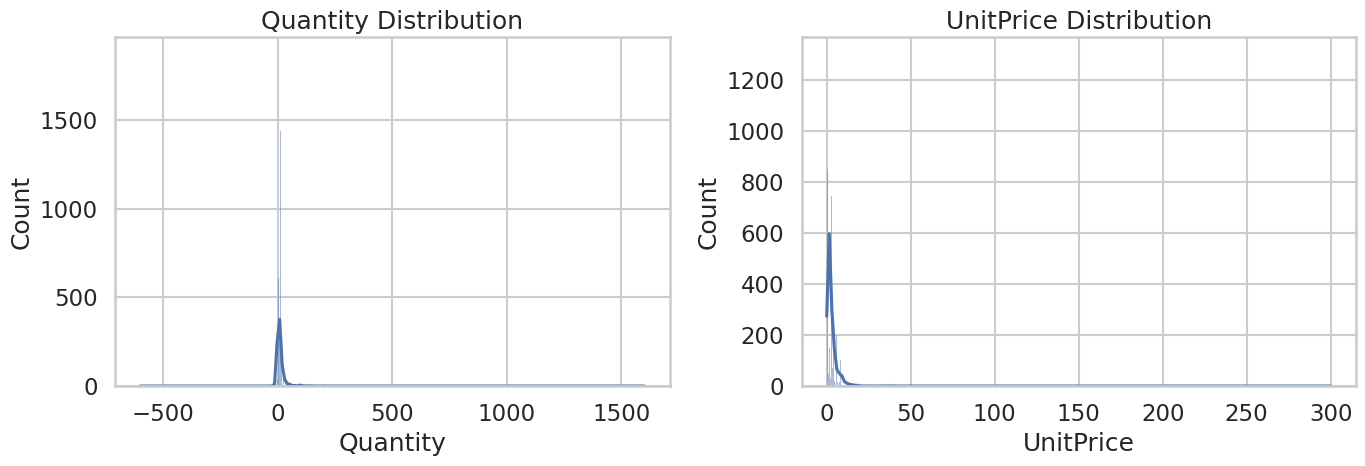

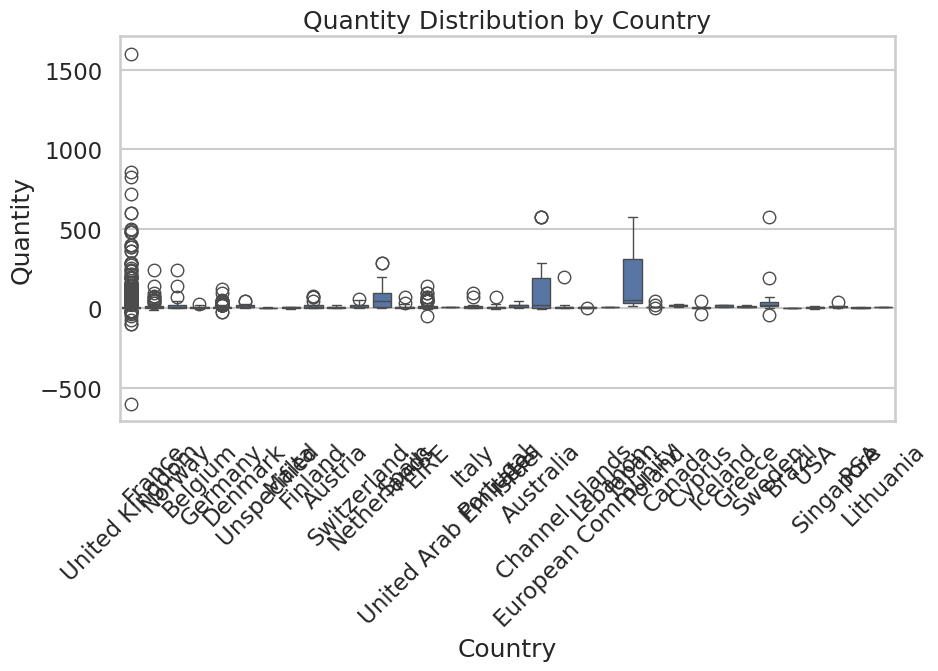

In [3]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

df_cleaned = df[df['CustomerID'].notna()]
df_sample = df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_sample['Quantity'], kde=True, ax=axes[0]).set(title="Quantity Distribution")
sns.histplot(df_sample['UnitPrice'], kde=True, ax=axes[1]).set(title="UnitPrice Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample, x='Country', y='Quantity')
plt.xticks(rotation=45)
plt.title("Quantity Distribution by Country")
plt.show()
#We identify missing values and remove rows with missing CustomerID to maintain accurate customer-based analysis. If the dataset is large, we take a sample for visualization.
#Then, we plot histograms to examine the distributions of Quantity and UnitPrice, followed by a boxplot to observe how Quantity varies across different countries.

In [4]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Cost'] = df['Sales'] * 0.7
df['Profit'] = df['Sales'] - df['Cost']
df['Profit_Cost_Ratio'] = df['Profit'] / df['Cost']
df['Sales_Bin'] = pd.qcut(df['Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Sqrt_Sales'] = np.sqrt(df['Sales'])
df['Invoice_Country'] = df['InvoiceNo'].astype(str) + "_" + df['Country'].astype(str)
df[['Sales', 'Cost', 'Profit', 'Profit_Cost_Ratio', 'Sales_Bin', 'Sqrt_Sales', 'Invoice_Country']].head()
#We generate a Sales feature by multiplying Quantity and UnitPrice, then estimate a cost (70% of sales) to compute Profit and the Profit_Cost_Ratio.
#We categorize Sales into four bins, apply a square root transformation to mitigate skewness, and concatenate InvoiceNo with Country to create a new string feature.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Sales,Cost,Profit,Profit_Cost_Ratio,Sales_Bin,Sqrt_Sales,Invoice_Country
0,15.30,10.710,4.590,0.428571,High,3.911521,536365_United Kingdom
1,20.34,14.238,6.102,0.428571,Very High,4.509989,536365_United Kingdom
2,22.00,15.400,6.600,0.428571,Very High,4.690416,536365_United Kingdom
3,20.34,14.238,6.102,0.428571,Very High,4.509989,536365_United Kingdom
4,20.34,14.238,6.102,0.428571,Very High,4.509989,536365_United Kingdom


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%A')
df[['InvoiceDate', 'Day', 'Month', 'Year', 'DayOfWeek']].head()
#We ensure InvoiceDate is properly converted to a datetime format and extract key time-based features, including the day, month, year, and weekday name, to facilitate future analysis and aggregation.

,InvoiceDate,Day,Month,Year,DayOfWeek
0,2010-12-01 08:26:00,1,12,2010,Wednesday
1,2010-12-01 08:26:00,1,12,2010,Wednesday
2,2010-12-01 08:26:00,1,12,2010,Wednesday
3,2010-12-01 08:26:00,1,12,2010,Wednesday
4,2010-12-01 08:26:00,1,12,2010,Wednesday


Summary statistics by Country:
                 Country  Invoice_Count  Total_Sales  Avg_Profit
0              Australia             69   137077.270   32.663369
1                Austria             19    10154.320    7.596748
2                Bahrain              4      548.400    8.658947
3                Belgium            119    40910.960    5.931990
4                 Brazil              1     1143.600   10.721250
5                 Canada              6     3666.380    7.284199
6        Channel Islands             33    20086.290    7.949719
7                 Cyprus             20    12946.290    6.244191
8         Czech Republic              5      707.720    7.077200
9                Denmark             21    18768.140   14.474144
10                  EIRE            360   263276.820    9.636780
11    European Community              5     1291.750    6.352869
12               Finland             48    22326.740    9.637442
13                France            461   197403.900    6.9

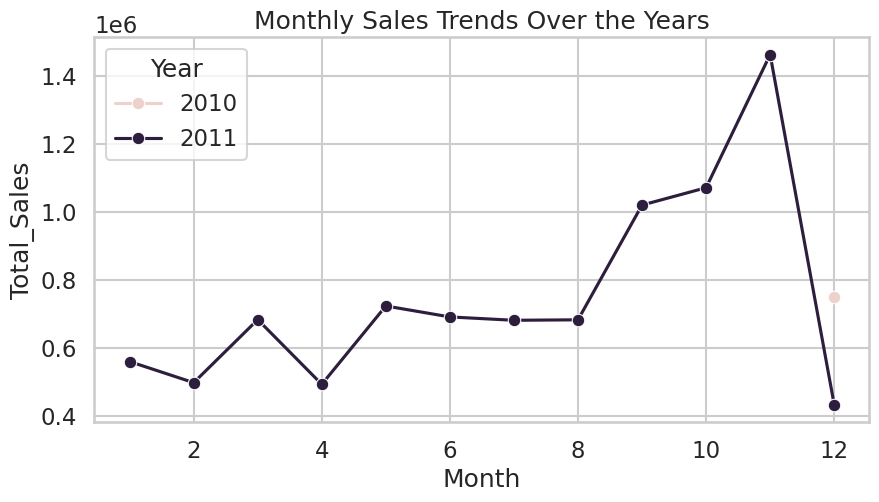

In [6]:
country_summary = df.groupby('Country').agg(
    Invoice_Count=('InvoiceNo', 'nunique'),
    Total_Sales=('Sales', 'sum'),
    Avg_Profit=('Profit', 'mean')
).reset_index()

print("Summary statistics by Country:")
print(country_summary)

sales_trend = df.groupby(['Year', 'Month']).agg(
    Invoice_Count=('InvoiceNo', 'nunique'),
    Total_Sales=('Sales', 'sum')
).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_trend, x='Month', y='Total_Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trends Over the Years")
plt.show()
#We aggregate data by Country to compute the number of unique invoices, total sales, and average profit.
#Additionally, we analyze sales trends by grouping the data by Year and Month, then visualize the monthly total sales to identify patterns over time.

In [7]:
from sklearn.feature_selection import mutual_info_classif

profit_median = df['Profit'].median()
df['HighProfit'] = (df['Profit'] > profit_median).astype(int)
num_features = ['Quantity', 'UnitPrice', 'Sales', 'Cost', 'Profit', 'Profit_Cost_Ratio', 'Sqrt_Sales']
X = df[num_features].fillna(0)
y = df['HighProfit']
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_results = pd.Series(mi_scores, index=num_features).sort_values(ascending=False)

print("Mutual Information scores for selected numerical features:")
print(mi_results)
#We define a binary target variable (HighProfit) by setting it to 1 if Profit is above the median and 0 otherwise.
#Then, we compute Mutual Information scores for key numerical features to determine which features provide the most predictive value for profitability.

Mutual Information scores for selected numerical features:
Sqrt_Sales           0.693944
Sales                0.693173
Cost                 0.693167
Profit               0.693159
Quantity             0.225139
UnitPrice            0.106587
Profit_Cost_Ratio    0.051397
dtype: float64


Variance explained by PCA components: [0.56791431 0.1567118 ]


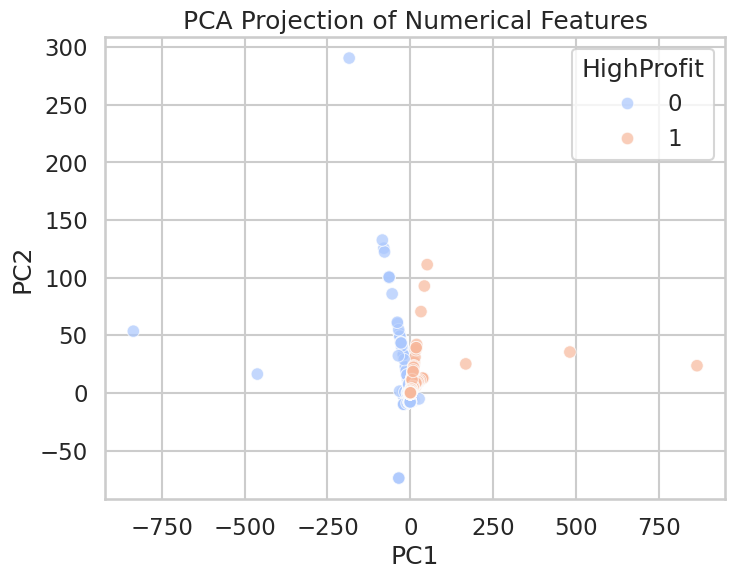

In [8]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_standardized)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['HighProfit'] = y.values
print("Variance explained by PCA components:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='HighProfit', palette='coolwarm', alpha=0.7)
plt.title("PCA Projection of Numerical Features")
plt.show()
#We standardize the numerical features using StandardScaler before applying PCA to reduce dimensionality to two principal components.
#The explained variance ratio is printed, and a scatter plot visualizes how well the PCA-transformed features distinguish between high-profit and low-profit transactions.

# When is Feature Engineering a “Nice to Have” vs. a “Must to Have”?

Feature engineering is useful but not always essential. When raw data is already well-structured and rich in information, modern machine learning models—especially deep learning—can often identify complex relationships without extensive manual feature creation. In such cases, additional feature engineering may only provide marginal improvements beyond an already strong baseline model.

However, in situations where the raw data is noisy, lacks structure, or does not directly capture critical domain-specific insights, feature engineering becomes crucial. A model's effectiveness is often constrained by the quality of its input features, and transforming or creating new representations can significantly enhance performance. This is particularly important when data is limited, computational resources are constrained, or interpretability is a priority. In real-world applications such as retail transaction analysis, well-crafted features can reveal hidden patterns that greatly improve predictive accuracy and overall model efficiency.
